3 projects using ANN:
1. `Binary` Classification
2. `Multiclass` Classification
3. `Regression`

# Binary Classification

In [334]:
# Import Libraries
import numpy as np
import pandas as pd

In [335]:
# Read Data
data = pd.read_csv('Churn_Modelling.csv')

In [336]:
data.shape

(10000, 14)

In [337]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [339]:
data.duplicated().sum()

0

In [340]:
# Dropping unnecessary features
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [341]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [342]:
# Encoding features 'Geography' and 'Gender' 
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [343]:
# Extracting input and output features
x = df.drop(columns=['Exited'])
y = df['Exited']

In [344]:
# Data splitting
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

In [345]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [346]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

train_x_scal = scal.fit_transform(train_x)
test_x_scal = scal.fit_transform(test_x)

In [347]:
# Import Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

There will be:
1. 1 input layer
2. 1 hidden layer ==> will put 3 nodes/perceptron in hidden layer
3. 1 output layer

In [348]:
# Building model
model = Sequential()

# Input layer
model.add(Dense(3,activation='sigmoid',input_dim=11))
# Output layer
model.add(Dense(1,activation='sigmoid'))

In [349]:
# Summary of model
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 3)                 36        
                                                                 
 dense_51 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**`model compilation stage`**<br>
1. Decide which loss function to use
2. Decide which optimizer to use for Gradean Descent

In [350]:
#binary_crossentropy or can say log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [351]:
hist = model.fit(train_x_scal, train_y,epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.6126
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5052
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4643
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4476
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4389
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4335
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4299
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4273
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4253
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4237


In [352]:
hist.history

{'loss': [0.6125969290733337,
  0.5052036046981812,
  0.4643191993236542,
  0.44758930802345276,
  0.43885499238967896,
  0.4334926903247833,
  0.42988231778144836,
  0.4272667169570923,
  0.42531195282936096,
  0.42373523116111755]}

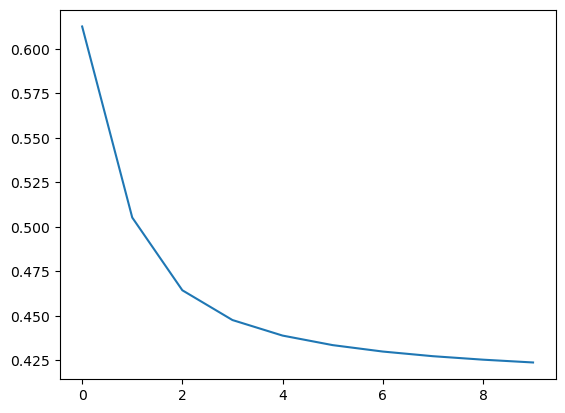

In [353]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

In [354]:
# Get weights and biases for the first hidden layer
weights_hidden_layer = model.layers[0].get_weights()[0]
biases_hidden_layer = model.layers[0].get_weights()[1]

# Get weights and biases for the output layer
weights_output_layer = model.layers[1].get_weights()[0]
biases_output_layer = model.layers[1].get_weights()[1]

In [355]:
weights_hidden_layer

array([[ 0.09240267, -0.02782314, -0.02001058],
       [-1.2658898 , -1.5125557 ,  0.45085406],
       [ 0.14999975,  0.26878497,  0.42722538],
       [-0.18789464, -0.31214827, -0.04868461],
       [ 0.03123307, -0.08660139, -0.71424645],
       [ 0.07400771, -0.02963317, -0.14161462],
       [ 0.76538   ,  0.46037135, -0.39311215],
       [ 0.19555174, -0.25243288,  0.11836012],
       [-0.21869873, -0.41712582,  0.88701236],
       [ 0.02074012,  0.01029627, -0.10208097],
       [ 0.22922245,  0.6276958 , -0.14224419]], dtype=float32)

In [356]:
biases_hidden_layer

array([ 0.45440927,  0.38173547, -0.4508704 ], dtype=float32)

In [357]:
weights_output_layer

array([[-1.4220502],
       [-1.3336822],
       [ 0.8342154]], dtype=float32)

In [358]:
biases_output_layer

array([-0.36348116], dtype=float32)

Here we have all `Weights and Biases` of our model.
 Let's check all `Weights and Biases` of model now


In [361]:
#predictions 
model.predict(test_x_scal)

63/63 [==============================] - 0s 2ms/step


array([[0.20048788],
       [0.09069246],
       [0.12018421],
       ...,
       [0.09865567],
       [0.10524528],
       [0.07754422]], dtype=float32)

The first row corresponds to the predicted probability for the first sample in the test set.
The second row corresponds to the predicted probability for the second sample, and so on.
Each value in the array is a probability between 0 and 1. For binary classification tasks, a common threshold value is 0.5. If the predicted probability is greater than 0.5, the sample is predicted to belong to class 1; otherwise, it is predicted to belong to class 0.

In [362]:
#output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

The 'np.where' function is then used to convert these probabilities into binary predictions.
If the predicted probability is greater than 0.5, the corresponding element in y_pred is set to 1.
If the predicted probability is less than or equal to 0.5, the corresponding element in y_pred is set to 0.

In [363]:
# Check for accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.8035

For better performance,
This can be improved by:
1. Hidden layer activation fucntion to `ReLU`
2. Increase Epoch to `1000`
3. Increase number of nodes in Hidden layer 
4. Increased number of Hidden Layers  ==> can lead to overfitting

In [364]:
# Building model
model = Sequential()

# Input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
# Output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 11)                132       
                                                                 
 dense_53 (Dense)            (None, 11)                132       
                                                                 
 dense_54 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [365]:
# Binary_crossentropy or can say log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(train_x_scal, train_y,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 4ms/step - loss: 0.5193 - accuracy: 0.7686 - val_loss: 0.4478 - val_accuracy: 0.8112
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.8044 - val_loss: 0.4244 - val_accuracy: 0.8112
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8098 - val_loss: 0.4142 - val_accuracy: 0.8144
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8177 - val_loss: 0.4064 - val_accuracy: 0.8138
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8291 - val_loss: 0.3939 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8381 - val_loss: 0.3836 - val_accuracy: 0.8338
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3699 - accuracy: 0.8448 - val_loss: 0.3742 - val_accuracy: 0.8394

Epoch 58/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3222 - accuracy: 0.8664 - val_loss: 0.3471 - val_accuracy: 0.8487
Epoch 59/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3222 - accuracy: 0.8672 - val_loss: 0.3482 - val_accuracy: 0.8494
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3221 - accuracy: 0.8655 - val_loss: 0.3473 - val_accuracy: 0.8475
Epoch 61/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3221 - accuracy: 0.8658 - val_loss: 0.3488 - val_accuracy: 0.8487
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3221 - accuracy: 0.8667 - val_loss: 0.3483 - val_accuracy: 0.8469
Epoch 63/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3216 - accuracy: 0.8677 - val_loss: 0.3470 - val_accuracy: 0.8500
Epoch 64/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8653 - val_loss: 0.3478 - val_accuracy:

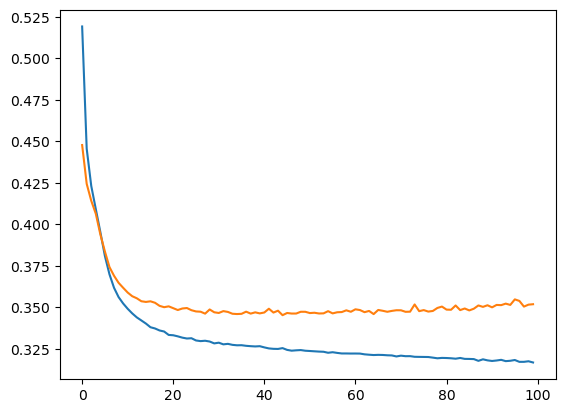

In [366]:
# Plot the loss
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

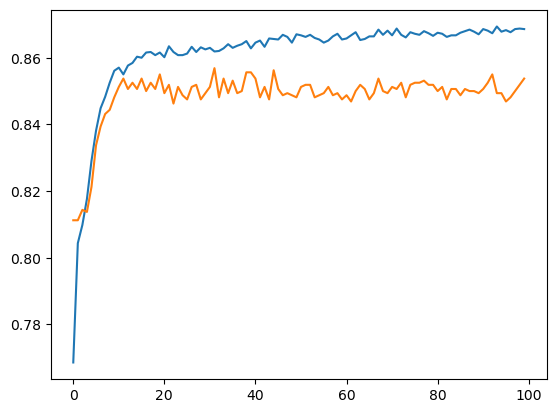

In [367]:
# Plot the accuracy
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

In [368]:
# Output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [369]:
# Accuracybscore
accuracy_score(test_y,y_pred)

0.8485

# Multiclass Classification

MNIST Dataset Description:

1. Number of Classes:
There are 10 classes in the dataset, corresponding to the digits 0 through 9.

2. Image Size:
Each image is a 28x28 pixel grayscale image.

The pixel values represent the intensity of the pixel, with 0 being white and 255 being black.

3. Number of Samples:
The dataset consists of 70,000 images.

This dataset is often split into training and testing sets, with common splits being 60,000 training images and 10,000 
testing images.

In [370]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [371]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [372]:
x_train.shape

(60000, 28, 28)

There are `60k images` with each image of dimension `28*28` in train set, rest of `10k images` are in x_test

In [373]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Data is in form of pixels

In [374]:
#pixels value of first image 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

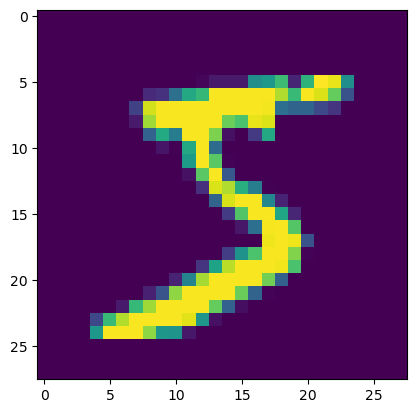

In [375]:
plt.imshow(x_train[0])
plt.show()

Normalization:

The pixel values are normalized by dividing each value by 255. This step scales the values to a range between 0 and 1.

In [376]:
x_train = x_train / 255
x_test = x_test / 255

In [377]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [378]:
# Flattening
from tensorflow.keras.layers import Dense,Flatten

Flattening:
    
Before feeding the images into a neural network, they are flattened from a 2D array (28x28) to a 1D array (784).
This is done using the Flatten layer in the neural network model.

Flatten layer convers high dimensions layer to 1-D

In [379]:
# Building model
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #changing 28*28 to 784 nodes
model.add(Dense(128,activation='relu')) #no need to given number of input as Flatten output will become input bydefault
model.add(Dense(10,activation='softmax'))

In [380]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 128)               100480    
                                                                 
 dense_56 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* (input)784 * 128(nodes) + 128(biases) ==> `100480` <== trainable params
* (hidden layer node)128 * 10(output layer nodes) + 10(biases) ==> `1290` <== trainable params

In [381]:
# Get weights and biases for the first hidden layer
weights_hidden_layer = model.layers[1].get_weights()[0]
biases_hidden_layer = model.layers[1].get_weights()[1]

# Get weights and biases for the output layer
weights_output_layer = model.layers[2].get_weights()[0]
biases_output_layer = model.layers[2].get_weights()[1]

In [382]:
weights_hidden_layer

array([[-0.08102792, -0.0626864 ,  0.05904161, ..., -0.01839352,
         0.00362317,  0.06446642],
       [ 0.04101052,  0.07242402, -0.02875435, ...,  0.05692308,
        -0.05413916, -0.07864153],
       [-0.03633247, -0.02938211, -0.04485292, ...,  0.04272204,
        -0.05717136, -0.0088126 ],
       ...,
       [-0.01575596,  0.04431137, -0.0796924 , ...,  0.07239503,
        -0.00560281,  0.0685067 ],
       [ 0.0617931 , -0.01498163,  0.05905264, ..., -0.0353473 ,
        -0.02045445, -0.06718937],
       [-0.04202569,  0.07530569,  0.04475778, ...,  0.03324302,
         0.03102554, -0.00118778]], dtype=float32)

In [383]:
biases_hidden_layer

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [384]:
weights_output_layer

array([[ 0.04453917, -0.18233174,  0.04271562, ..., -0.00626174,
        -0.13598892,  0.15149553],
       [ 0.00792532,  0.124061  ,  0.10797147, ..., -0.00902264,
        -0.15704128, -0.14578894],
       [-0.06100713,  0.14002581,  0.10401182, ..., -0.11673842,
         0.18547048, -0.05159631],
       ...,
       [ 0.00788902, -0.1164481 ,  0.1758598 , ..., -0.10485744,
         0.09222867, -0.19802168],
       [ 0.19492058,  0.15648331,  0.13877143, ..., -0.19273229,
        -0.19258633, -0.15503936],
       [ 0.04767375,  0.04420568,  0.18115194, ...,  0.13592602,
         0.12736155,  0.13080655]], dtype=float32)

In [385]:
biases_output_layer

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**`NOTE`**<br>
If you have more then 1 node in output ==> use softmax for classification

In [386]:
#model compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#train model
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2891 - accuracy: 0.9169 - val_loss: 0.1575 - val_accuracy: 0.9566
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1304 - accuracy: 0.9623 - val_loss: 0.1188 - val_accuracy: 0.9657
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0967 - val_accuracy: 0.9709
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0919 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0863 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0930 - val_accura

* in `sparse_categorical_crossentropy` ==> no need to one-hot encode labels i.e. 0 to 9
* in `categorical_crossentropy` ==> need to one-hot encode labels i.e. 0 to 9

validation_split=0.2: This parameter specifies that 20% of the training data will be used as validation data. The training data will be split, and the model's performance on the validation data will be monitored during training.

In [387]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


It is giving probability for different number from 0 to 9 <br>
Aim to find out which number is the given input off, so :
* take out max value index position out of above array

In [388]:
y_pred = y_prob.argmax(axis=1)
y_pred 

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [389]:
accuracy_score(y_test,y_pred)

0.9791

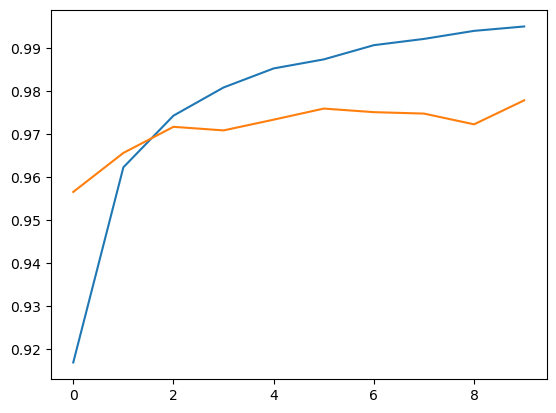

In [390]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

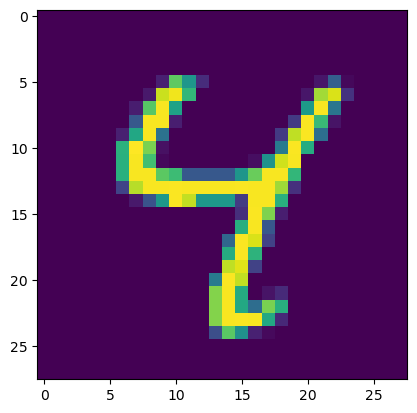

In [391]:
plt.imshow(x_test[6])

In [392]:
# lets see how it is predicting
model.predict(x_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([4], dtype=int64)

In [393]:
true_label = y_test[6]
print(f"True label for the first test image: {true_label}")

True label for the first test image: 4


# Regression

In [394]:
#path = '/kaggle/input/graduate-admissions/'
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.shape

(500, 9)

In [395]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [396]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [398]:
data.drop(columns=['Serial No.'],inplace=True)

In [399]:
data.shape

(500, 8)

In [400]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [401]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 7), (400,), (100, 7), (100,))

In [402]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_x_scale = scale.fit_transform(train_x) #scaled np array
test_x_scale = scale.fit_transform(test_x)   #scaled np array

In [403]:
 model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear')) #as this is Regression problem

In [404]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 7)                 56        
                                                                 
 dense_58 (Dense)            (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [405]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 1s 35ms/step - loss: 1.6121 - val_loss: 1.4229
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 1.2612 - val_loss: 1.1072
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9739 - val_loss: 0.8528
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.7481 - val_loss: 0.6521
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5694 - val_loss: 0.4986
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4338 - val_loss: 0.3833
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 0.3333 - val_loss: 0.2960
Epoch 8/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2558 - val_loss: 0.2318
Epoch 9/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2022 - val_loss: 0.1822
Epoch 10/10
10/10 [==============================] - 0s 8ms/step - loss: 0.1602 - val_loss: 0.1461


In [406]:
#prediction
y_pred = model.predict(test_x_scale)

4/4 [==============================] - 0s 4ms/step


In [407]:
from sklearn.metrics import r2_score

r2_score(test_y,y_pred)

-8.190416307631954

Performance is not that good <br>
Lets upgrade it's architecture

In [408]:
 model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

In [409]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 7)                 56        
                                                                 
 dense_60 (Dense)            (None, 7)                 56        
                                                                 
 dense_61 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [410]:
# Get weights and biases for the first hidden layer
weights_hidden_layer = model.layers[1].get_weights()[0]
biases_hidden_layer = model.layers[1].get_weights()[1]

# Get weights and biases for the output layer
weights_output_layer = model.layers[2].get_weights()[0]
biases_output_layer = model.layers[2].get_weights()[1]

In [411]:
weights_hidden_layer

array([[-0.06128293, -0.2519413 ,  0.62249076, -0.595446  , -0.42818505,
         0.1503542 ,  0.30677903],
       [ 0.46710026, -0.55623174, -0.20816118,  0.2951759 ,  0.12819558,
        -0.21342972, -0.4328806 ],
       [-0.4112224 ,  0.38013923,  0.3926251 , -0.47022828,  0.32580143,
        -0.26765105, -0.46454751],
       [-0.23597354, -0.26552024,  0.62790406,  0.23552632,  0.38359225,
        -0.62655884, -0.12743014],
       [-0.34912425, -0.5239384 , -0.4077841 ,  0.04052222,  0.594067  ,
         0.02962911,  0.4829452 ],
       [ 0.10112154,  0.48353326, -0.63814664,  0.15987003,  0.20896453,
        -0.37607783, -0.10470295],
       [ 0.11723351,  0.07412595,  0.3690921 , -0.28947532,  0.24518418,
        -0.33423343,  0.13736743]], dtype=float32)

In [412]:
biases_hidden_layer

array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [413]:
weights_output_layer

array([[-0.79065585],
       [ 0.62105817],
       [-0.7860702 ],
       [ 0.22569007],
       [-0.23994142],
       [-0.11674368],
       [-0.2912038 ]], dtype=float32)

In [414]:
biases_output_layer

array([0.], dtype=float32)

In [415]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 44ms/step - loss: 1.6866 - val_loss: 1.5007
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 1.3962 - val_loss: 1.2309
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.1455 - val_loss: 1.0026
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.9426 - val_loss: 0.8165
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.7872 - val_loss: 0.6843
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6712 - val_loss: 0.5942
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5921 - val_loss: 0.5282
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5333 - val_loss: 0.4839
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4805 - val_loss: 0.4318
Epoch 10/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4177 - val_loss: 0.3640

10/10 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 83/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 84/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 85/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 86/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 87/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 89/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 90/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 91/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 92/100


In [416]:
#prediction
y_pred = model.predict(test_x_scale)

r2_score(test_y,y_pred)

4/4 [==============================] - 0s 3ms/step


0.743526994867298

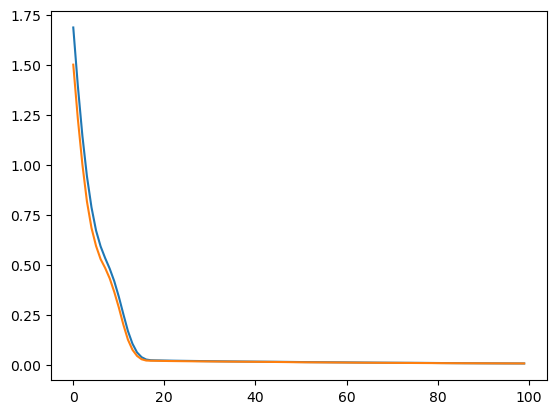

In [417]:
#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()